## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela_.csv')

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [4]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [5]:
DataSet.head()

,NumAmostra,Area,Delta,Output1,Output2
0,69,81,68,1,0
1,89,87,56,1,0
2,68,69,55,1,0
3,36,50,80,1,0
4,71,72,50,1,0


In [6]:
DataSet.describe()

,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,59.777778,63.697318,54.747126,0.375479,0.624521
std,17.293075,30.629366,35.548413,0.485177,0.485177
min,3.000000,6.000000,17.000000,0.000000,0.000000
25%,50.000000,46.000000,38.000000,0.000000,0.000000
50%,59.000000,56.000000,44.000000,0.000000,1.000000
75%,69.000000,68.000000,54.000000,1.000000,1.000000
max,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [7]:
DataSet.columns

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

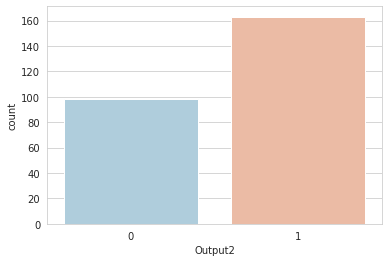

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

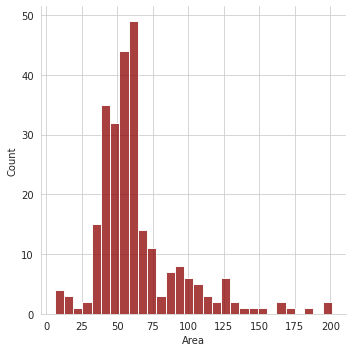

In [9]:
sns.displot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

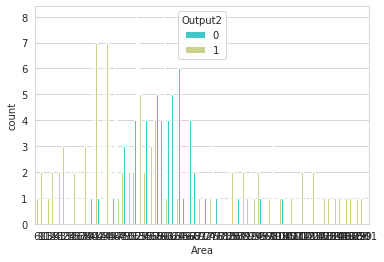

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

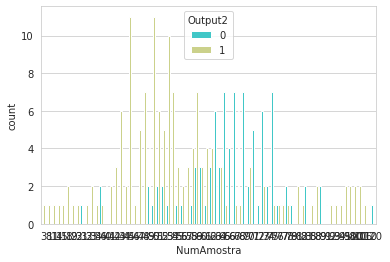

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

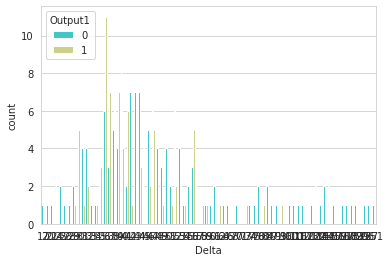

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [13]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

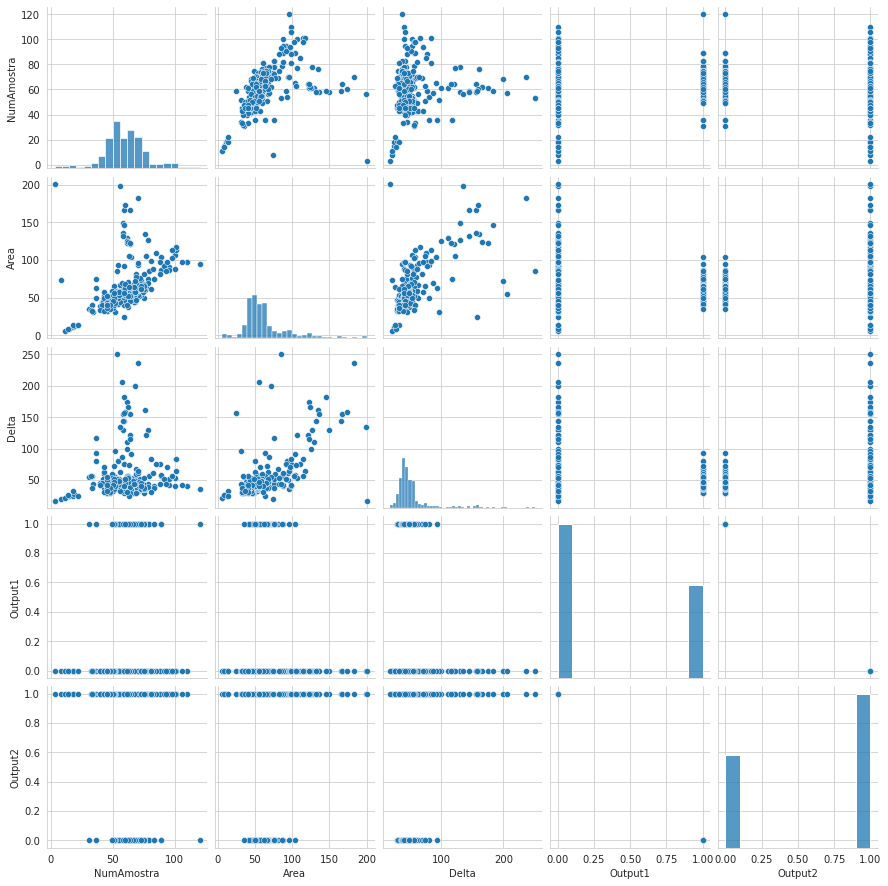

In [14]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

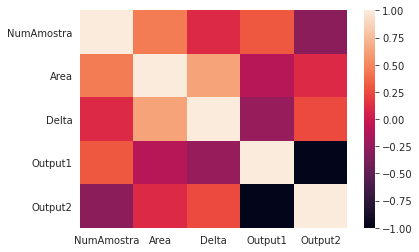

In [15]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])


In [17]:
DataSetScaled.head()

,NumAmostra,Area,Delta,Output1,Output2
0,0.534314,0.565990,0.373528,1.289676,-1.289676
1,1.693069,0.762257,0.035312,1.289676,-1.289676
2,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [18]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=654321)

print(y_test)
print(X_test)

     Output1  Output2
173        0        1
179        0        1
168        0        1
250        0        1
67         1        0
..       ...      ...
79         1        0
104        0        1
14         1        0
64         1        0
243        0        1

[79 rows x 2 columns]
     NumAmostra      Area     Delta
173    2.040695  0.762257 -0.359274
179   -0.392689 -0.251788 -0.133796
168    0.244626  1.939858  1.726394
250   -1.609381 -0.971433  0.035312
67     0.186688 -0.120943 -0.387459
..          ...       ...       ...
79     3.489138  1.023946 -0.528382
104   -0.334751 -0.219077 -0.190166
14     0.766065  0.337012 -0.105612
64     0.012875 -0.415344 -0.443828
243   -2.652260 -1.789211 -0.810229

[79 rows x 3 columns]


## Criando o Modelo de MPL

In [20]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 16
N_output = 2
learnrate = 0.1

## Inicialização dos pesos da MPL (Aleatório)

In [21]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[ 0.27412548 -0.01230159  0.32161273  0.08603765 -0.01543208  0.10244683
   0.09576346 -0.0463873  -0.09911676  0.15342754 -0.01069438 -0.05288657
   0.07429858 -0.01551893  0.003221    0.03869343]
 [ 0.0534305   0.13008416 -0.20248323 -0.16079641 -0.01811495  0.14316153
   0.04597733  0.10088423 -0.0962859  -0.09019229 -0.05044903 -0.12471006
   0.06489833 -0.10111651  0.02850564 -0.02448036]
 [ 0.07828387 -0.10343738  0.12911572 -0.01750193 -0.12253521 -0.14473866
   0.06440497 -0.00362269  0.09637608 -0.01725735  0.05468362  0.0637683
  -0.11586123  0.05986324  0.03165865 -0.09563534]]
Pesos da Camada de Saída:
[[-0.04348429 -0.20836017]
 [-0.06500355  0.06157238]
 [-0.01386565  0.14568601]
 [-0.02339895  0.01155054]
 [-0.09980265  0.06432847]
 [-0.11565789  0.18148814]
 [-0.14978269 -0.02449742]
 [-0.02999093 -0.09497108]
 [ 0.01733375 -0.04906144]
 [ 0.06376955 -0.00239755]
 [ 0.01782155  0.10003058]
 [-0.07313853  0.03299006]
 [-0.06941843  0.16877991]
 [

## Função que calcula a acurácia do modelo

In [22]:
def measure_accuracy():
    # Calcule a precisão dos dados de teste
    n_records, n_features = X_test.shape
    predictions=0

    for xi, yi in zip(X_test.values, y_test.values):

    # Forward Pass
            #Camada oculta
            #Calcule a combinação linear de entradas e pesos sinápticos
            hidden_layer_input = np.dot(xi, weights_input_hidden)
            #Aplicado a função de ativação
            hidden_layer_output = sigmoid(hidden_layer_input)

            #Camada de Saída
            #Calcule a combinação linear de entradas e pesos sinápticos
            output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

            #Aplicado a função de ativação 
            output = sigmoid(output_layer_in)

    #-------------------------------------------    

    #Cálculo do Erro da Predição
            ## TODO: Cálculo do Erro        
            if (output[0]>output[1]):
                if (yi[0]>yi[1]):
                    predictions+=1

            if (output[1]>=output[0]):
                if (yi[1]>yi[0]):
                    predictions+=1
                    
    return predictions/n_records

## Algoritmo Backpropagation

In [23]:
epochs = 8500
target_loss = 0.1
last_loss=None
EvolucaoError=[]
IndiceError=[]
Accuracies=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    
#     if  e % (epochs / 20) == 0:
    hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
    out = sigmoid(np.dot(hidden_output,
                         weights_hidden_output))
    loss = np.mean((out - yi) ** 2)

#     if last_loss and last_loss < loss:
#         print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
#     else:
#         print("Erro quadrático no treinamento: ", loss)
    last_loss = loss
    
    EvolucaoError.append(loss)
    IndiceError.append(e)
    accuracy = measure_accuracy()
    Accuracies.append(accuracy)
            
    if(loss < target_loss):
        break

In [24]:
### Gráfico da Evolução do Erro

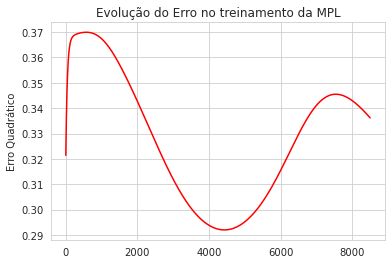

In [25]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

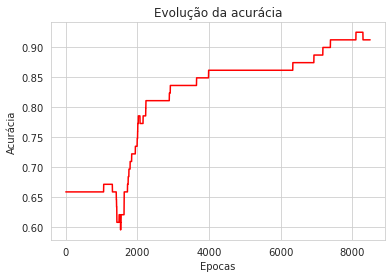

In [26]:
plt.plot(IndiceError, Accuracies, 'r') # 'r' is the color red
plt.xlabel('Epocas')
plt.ylabel('Acurácia')
plt.title('Evolução da acurácia')
plt.show()

## Validação do modelo

In [27]:
print("A Acurácia da Predição é de: {:.3f}".format(measure_accuracy()))

A Acurácia da Predição é de: 0.911
